In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('/mnt/c/Users/ouyangkang/Desktop/clustering.csv', index_col=0)
# remove first three rows
data = data[3:]
data = data.astype('float64')
# normalization

def normalization(x):
    normalization_x = (x-min(x)) / (max(x)-min(x))
    return normalization_x

normal_data = data.apply(normalization, axis=1)

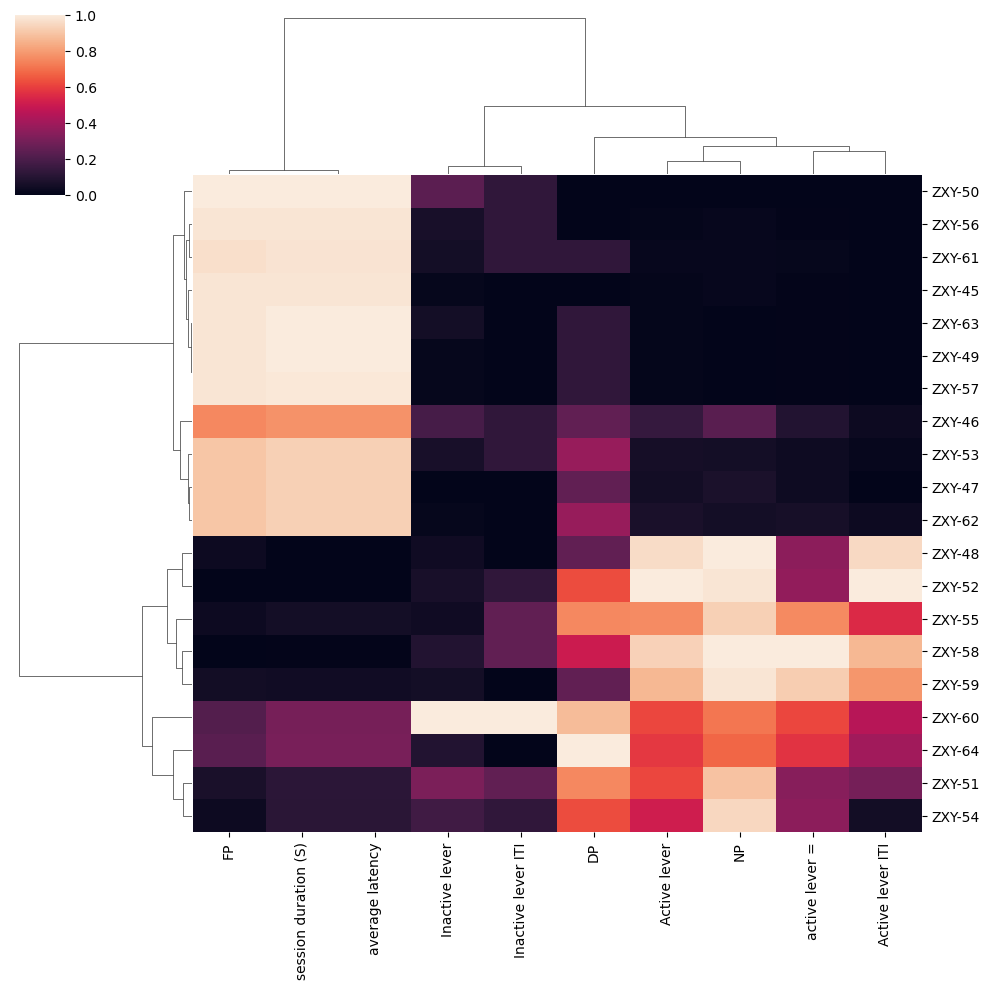

In [3]:
sns.clustermap(normal_data.T, method='ward')

In [70]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull

/home/ouyangkang/software/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


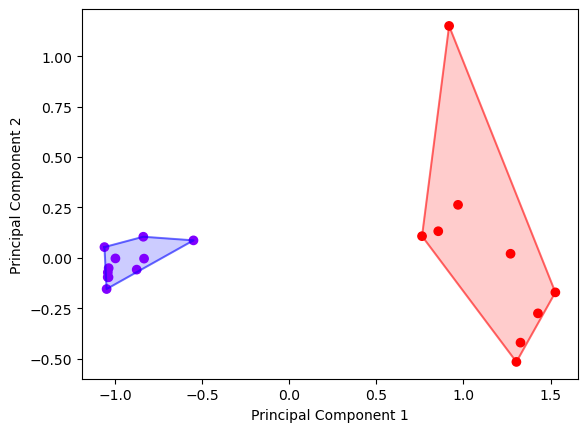

In [104]:
# instance class
kmeans = KMeans(n_clusters=2)
kmeans.fit(normal_data.T)
# labels
cluster_labels = kmeans.labels_
# visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(normal_data.T)

x, y = pca_data[cluster_labels == 1][:, 0], pca_data[cluster_labels == 1][:, 1]
hull = ConvexHull(pca_data[cluster_labels == 1])
hull_points = [pca_data[cluster_labels == 1][i] for i in hull.vertices]
hull_points.append(hull_points[0])

hull_x, hull_y = zip(*hull_points)

z, c = pca_data[cluster_labels == 0][:, 0], pca_data[cluster_labels == 0][:, 1]
hull_b = ConvexHull(pca_data[cluster_labels == 0])
hull_points_b = [pca_data[cluster_labels == 0][i] for i in hull_b.vertices]
hull_points_b.append(hull_points_b[0])

hull_x_b, hull_y_b = zip(*hull_points_b)

# polygon = Polygon(pca_data[cluster_labels == 1], closed=True, edgecolor='blue', facecolor='lightblue')
fig, ax = plt.subplots()
plt.plot(hull_x, hull_y, color='red', alpha=0.5)
plt.fill(hull_x, hull_y, color='red', alpha=0.2)
plt.plot(hull_x_b, hull_y_b, color='blue', alpha=0.5)
plt.fill(hull_x_b, hull_y_b, color='blue', alpha=0.2)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()